In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
df_var = pd.read_csv("synthetic_weather_data_wo_label.csv",header=0, index_col=0, parse_dates=True)

In [3]:
# Test for stationary
ad_fuller_test_temperature = adfuller(df_var['temperature'])
print('ad_fuller_test on temperature')
print(f'ADF Statistic: {ad_fuller_test_temperature[0]}')
print(f'p-value: {ad_fuller_test_temperature[1]}')

ad_fuller_test_pressure = adfuller(df_var['pressure'])
print('ad_fuller_test on pressure')
print(f'ADF Statistic: {ad_fuller_test_pressure[0]}')
print(f'p-value: {ad_fuller_test_pressure[1]}')

ad_fuller_test_humidity = adfuller(df_var['humidity'])
print('ad_fuller_test on humidity')
print(f'ADF Statistic: {ad_fuller_test_humidity[0]}')
print(f'p-value: {ad_fuller_test_humidity[1]}')

ad_fuller_test on temperature
ADF Statistic: -14.534913289227394
p-value: 5.258250094577109e-27
ad_fuller_test on pressure
ADF Statistic: -14.902048605743865
p-value: 1.5019298946503847e-27
ad_fuller_test on humidity
ADF Statistic: -12.562418655330086
p-value: 2.0884646331942584e-23


In [4]:
df_var.head()

,temperature,pressure,humidity
date,,,
2008-01-01,-0.09,987.23,51.10
2008-01-02,-0.96,987.06,51.17
2008-01-03,-0.65,987.82,51.13
2008-01-04,-0.68,986.95,50.94
2008-01-05,-0.42,988.15,51.30


In [5]:
df_var.tail()

,temperature,pressure,humidity
date,,,
2022-12-27,-1.93,984.39,49.59
2022-12-28,-1.54,984.69,50.18
2022-12-29,-1.44,985.60,50.98
2022-12-30,-1.87,985.40,50.24
2022-12-31,-1.26,986.75,50.38


In [6]:
# Not on same scale and need to split the data to the train and test part 
Ntest = 365   # 1 year
train= df_var.iloc[:-Ntest].copy()
test= df_var.iloc[-Ntest:].copy()

scaler_temp= RobustScaler()
train['ScaledTemp'] = scaler_temp.fit_transform(train[['temperature']])
test['ScaledTemp'] = scaler_temp.transform(test[['temperature']])

scaler_humid= RobustScaler()
train['ScaledHumid'] = scaler_humid.fit_transform(train[['humidity']])
test['ScaledHumid'] = scaler_humid.transform(test[['humidity']])

scaler_pressure= RobustScaler()
train['ScaledPressure'] = scaler_pressure.fit_transform(train[['pressure']])
test['ScaledPressure'] = scaler_pressure.transform(test[['pressure']])

train_idx = df_var.index <=train.index[-1]
test_idx = df_var.index > train.index[-1]

df_var.loc[train_idx, 'ScaledTemp']= train['ScaledTemp']
df_var.loc[test_idx, 'ScaledTemp']= test['ScaledTemp']

df_var.loc[train_idx, 'ScaledHumid']= train['ScaledHumid']
df_var.loc[test_idx, 'ScaledHumid']= test['ScaledHumid']

df_var.loc[train_idx, 'ScaledPressure']= train['ScaledPressure']
df_var.loc[test_idx, 'ScaledPressure']= test['ScaledPressure']

<AxesSubplot: xlabel='date'>

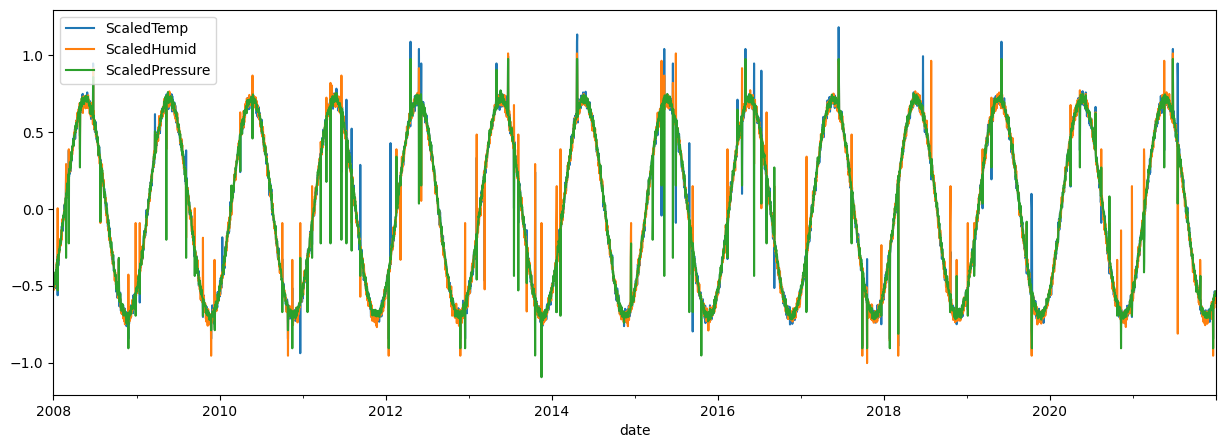

In [7]:
cols = ['ScaledTemp', 'ScaledHumid', 'ScaledPressure']
train[cols].plot(figsize=(15,5))

<AxesSubplot: xlabel='date'>

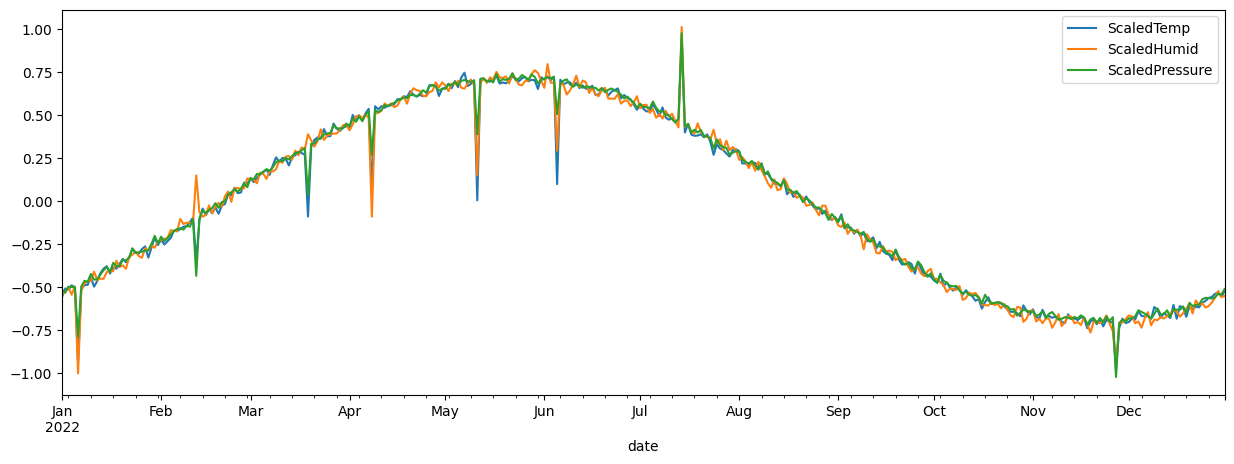

In [8]:
cols = ['ScaledTemp', 'ScaledHumid', 'ScaledPressure']
test[cols].plot(figsize=(15,5))

In [9]:
granger_1= grangercausalitytests(train[['ScaledTemp','ScaledPressure']], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=589.5231, p=0.0000  , df_denom=5110, df_num=1
ssr based chi2 test:   chi2=589.8692, p=0.0000  , df=1
likelihood ratio test: chi2=558.2532, p=0.0000  , df=1
parameter F test:         F=589.5231, p=0.0000  , df_denom=5110, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=209.7003, p=0.0000  , df_denom=5107, df_num=2
ssr based chi2 test:   chi2=419.8112, p=0.0000  , df=2
likelihood ratio test: chi2=403.4624, p=0.0000  , df=2
parameter F test:         F=209.7003, p=0.0000  , df_denom=5107, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=111.1270, p=0.0000  , df_denom=5104, df_num=3
ssr based chi2 test:   chi2=333.8383, p=0.0000  , df=3
likelihood ratio test: chi2=323.3882, p=0.0000  , df=3
parameter F test:         F=111.1270, p=0.0000  , df_denom=5104, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=73.6013 , p=0.

In [10]:
granger_2= grangercausalitytests(train[['ScaledPressure','ScaledHumid']], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1317.9915, p=0.0000  , df_denom=5110, df_num=1
ssr based chi2 test:   chi2=1318.7652, p=0.0000  , df=1
likelihood ratio test: chi2=1173.2429, p=0.0000  , df=1
parameter F test:         F=1317.9915, p=0.0000  , df_denom=5110, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=407.2265, p=0.0000  , df_denom=5107, df_num=2
ssr based chi2 test:   chi2=815.2504, p=0.0000  , df=2
likelihood ratio test: chi2=756.4211, p=0.0000  , df=2
parameter F test:         F=407.2265, p=0.0000  , df_denom=5107, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=203.3212, p=0.0000  , df_denom=5104, df_num=3
ssr based chi2 test:   chi2=610.8000, p=0.0000  , df=3
likelihood ratio test: chi2=576.9725, p=0.0000  , df=3
parameter F test:         F=203.3212, p=0.0000  , df_denom=5104, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=124.6926, 

C:\Users\USER\anaconda3\envs\thesiswork\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


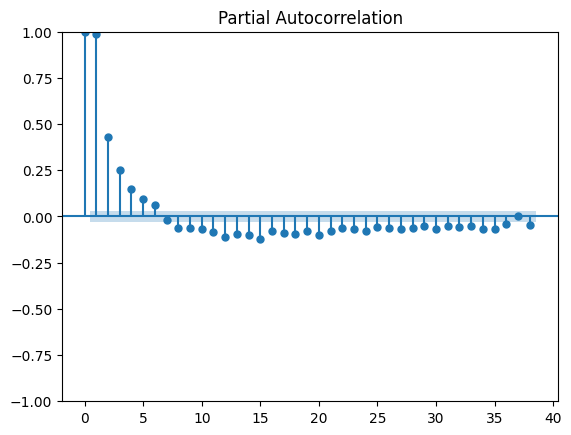

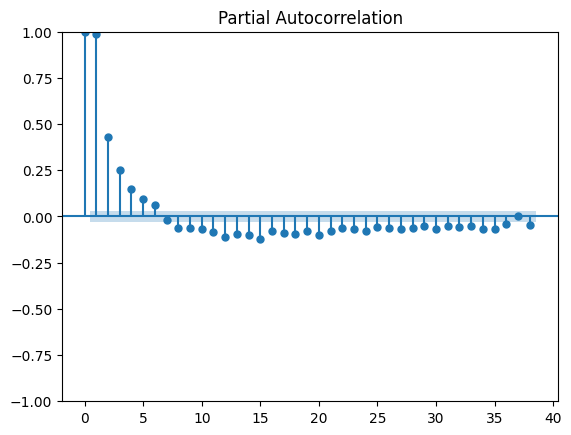

In [11]:
plot_pacf(train['ScaledTemp'])

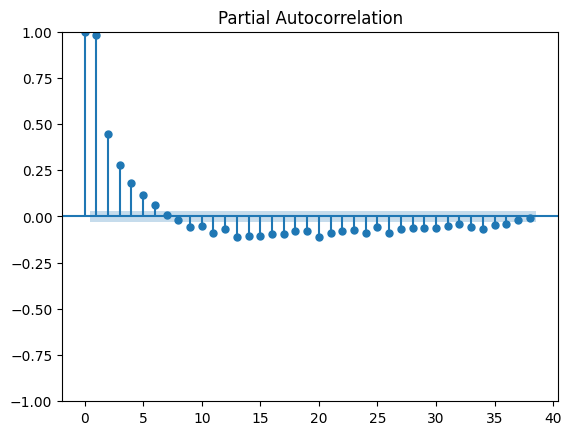

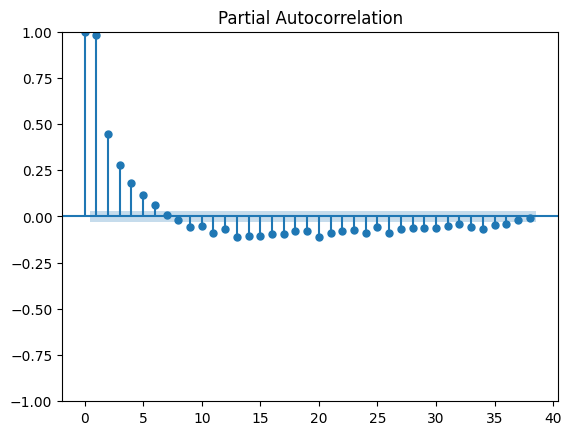

In [12]:
plot_pacf(train['ScaledPressure'])

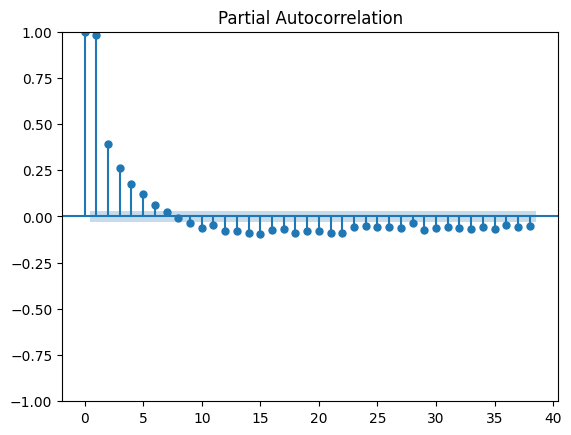

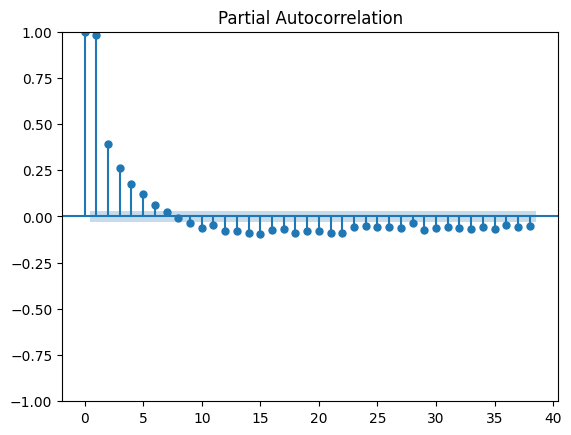

In [13]:
plot_pacf(train['ScaledHumid'])

In [14]:
print(train[cols])

            ScaledTemp  ScaledHumid  ScaledPressure
date                                               
2008-01-01   -0.472278    -0.519051       -0.501793
2008-01-02   -0.513243    -0.515696       -0.505789
2008-01-03   -0.498646    -0.517613       -0.487922
2008-01-04   -0.500059    -0.526719       -0.508375
2008-01-05   -0.487816    -0.509466       -0.480165
...                ...          ...             ...
2021-12-27   -0.582931    -0.612030       -0.567382
2021-12-28   -0.556092    -0.585670       -0.562445
2021-12-29   -0.598941    -0.540618       -0.565736
2021-12-30   -0.560800    -0.585670       -0.535880
2021-12-31   -0.567393    -0.548766       -0.546459

[5114 rows x 3 columns]


In [15]:
var_model=VAR(train[cols])
fitted_model=var_model.fit(maxlags=50)
#print(fitted_model.summary())

C:\Users\USER\anaconda3\envs\thesiswork\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
sorted_order=var_model.select_order(maxlags=200)
print(sorted_order.summary())

  VAR Order Selection (* highlights the minimums)  
        AIC         BIC         FPE         HQIC   
---------------------------------------------------
0        -11.55      -11.54   9.658e-06      -11.55
1        -15.99      -15.97   1.142e-07      -15.98
2        -16.18      -16.15   9.436e-08      -16.17
3        -16.23     -16.19*   8.969e-08      -16.21
4        -16.24      -16.18   8.893e-08      -16.22
5        -16.23      -16.17   8.914e-08      -16.21
6        -16.23      -16.16   8.936e-08      -16.20
7        -16.24      -16.15   8.888e-08      -16.21
8        -16.25      -16.15   8.781e-08      -16.21
9        -16.26      -16.15   8.683e-08      -16.22
10       -16.27      -16.15   8.563e-08      -16.23
11       -16.29      -16.15   8.463e-08      -16.24
12       -16.30      -16.15   8.336e-08      -16.25
13       -16.32      -16.16   8.211e-08      -16.26
14       -16.32      -16.15   8.136e-08      -16.26
15       -16.34      -16.16   8.002e-08      -16.28
16       -16

In [17]:
fcast=fitted_model.forecast(y = train[cols].values[-50:], steps= Ntest)

In [18]:
df_var.loc[train_idx, 'Train Pred Temperature']=fitted_model.fittedvalues['ScaledTemp']
df_var.loc[test_idx, 'Test Pred Temperature']=fcast[:,0]

<AxesSubplot: xlabel='date'>

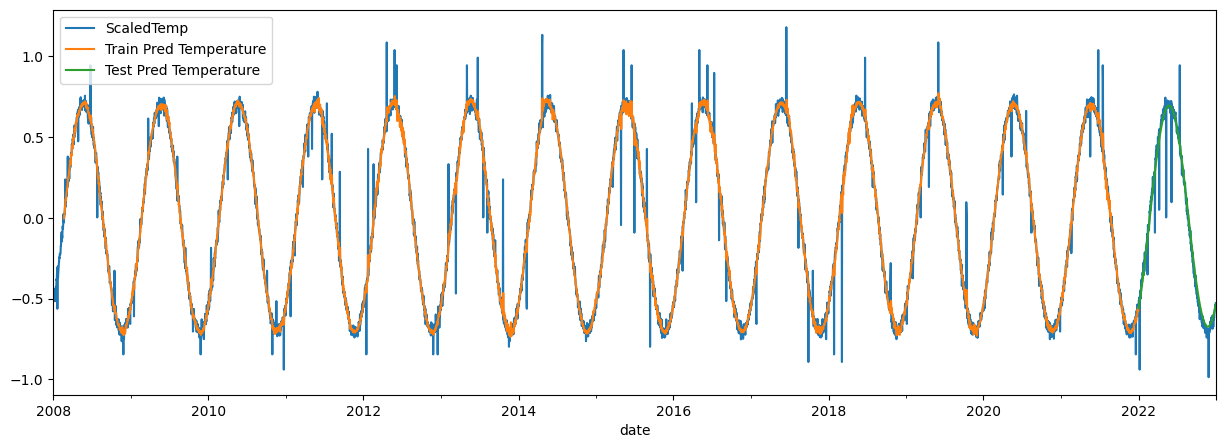

In [19]:
plot_cols = ['ScaledTemp', 'Train Pred Temperature', 'Test Pred Temperature']
df_var[plot_cols].plot(figsize=(15,5))

In [20]:
df_var.loc[train_idx, 'Train Pred Humidity']=fitted_model.fittedvalues['ScaledHumid']
df_var.loc[test_idx, 'Test Pred Humidity']=fcast[:,1]

<AxesSubplot: xlabel='date'>

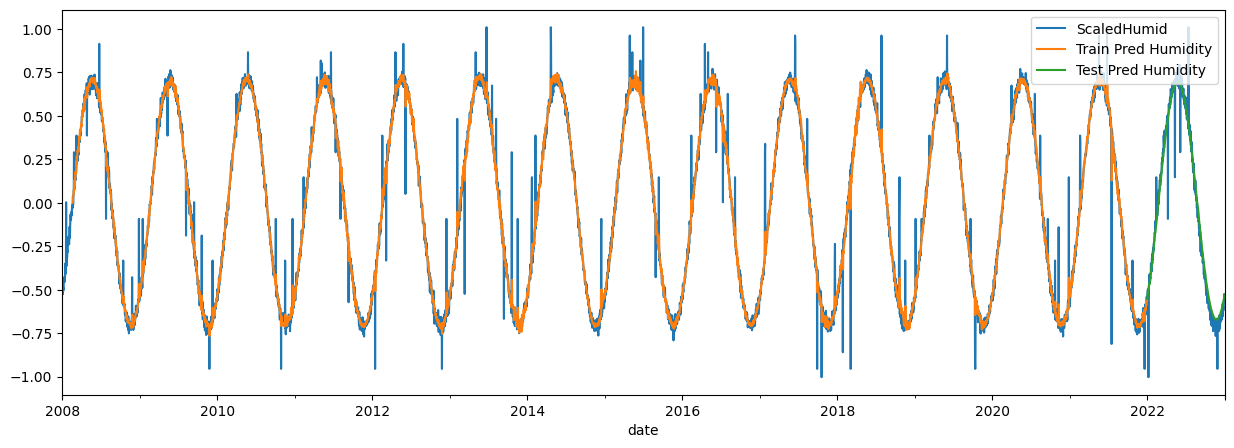

In [21]:
plot_cols = ['ScaledHumid', 'Train Pred Humidity', 'Test Pred Humidity']
df_var[plot_cols].plot(figsize=(15,5))

In [22]:
df_var.loc[train_idx, 'Train Pred Pressure']=fitted_model.fittedvalues['ScaledPressure']
df_var.loc[test_idx, 'Test Pred Pressure']=fcast[:,2]

<AxesSubplot: xlabel='date'>

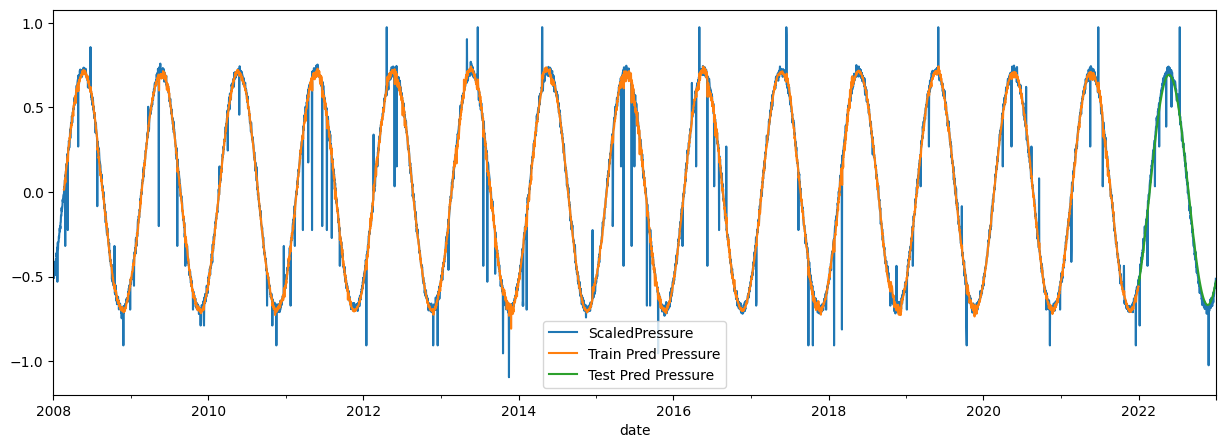

In [23]:
plot_cols = ['ScaledPressure', 'Train Pred Pressure', 'Test Pred Pressure']
df_var[plot_cols].plot(figsize=(15,5))

In [24]:
#clearly overfitted, but not removing seasonal component may be a good decision.

In [25]:
# this model has damping effect

In [26]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Apr, 2023
Time:                     19:50:50
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.8878
Nobs:                     5064.00    HQIC:                  -16.2674
Log likelihood:           20603.5    FPE:                7.01997e-08
AIC:                     -16.4720    Det(Omega_mle):     6.42767e-08
--------------------------------------------------------------------
Results for equation ScaledTemp
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.000397         0.000833           -0.476           0.634
L1.ScaledTemp              0.150320         0.015130            9.935           0.000
L1.ScaledHumid            -0.003305

In [27]:
df_var_coef=fitted_model.params

In [28]:
df_var_coef.to_csv("Var_Coef.csv")

In [29]:
df_var_coef.head(27)

,ScaledTemp,ScaledHumid,ScaledPressure
const,-0.000397,0.000284,0.001075
L1.ScaledTemp,0.150320,-0.012726,0.019312
L1.ScaledHumid,-0.003305,0.200484,0.029587
L1.ScaledPressure,-0.006663,0.026567,0.089320
L2.ScaledTemp,0.044309,0.034983,0.006934
L2.ScaledHumid,0.034568,0.008245,0.029042
L2.ScaledPressure,0.008082,0.007762,0.015302
L3.ScaledTemp,0.025549,0.028574,0.022845
L3.ScaledHumid,0.022237,0.018104,0.021093
L3.ScaledPressure,0.006997,0.033551,0.009085


In [30]:
fitted_model.k_ar

50

In [ ]:
#Will be modified later

### Physical Modeling with VAR when 3 year test set and 37 lag

In [31]:
"""temp_pred= 0.15*temp(t-1)+0.06temp(t-2)+0.04humid(t-2)+0.03humid(t-3)+0.03humid(t-4)+0.03pressure(t-4)+0.03humid(t-5)
           +0.05temp(t-6)+0.04humid(t-6)+0.03humid(t-7)+0.03humid(t-9)+0.03pressure(t-11)+0.04humid(t-12)+0.06pressure(t-13)
           +0.03humid(t-15)+0.03pressure(t-15)+0.03pressure(t-18)-0.03humid(t-28)-0.03humid(t-32)-0.05pressure(t-32)-0.04temp(t-35)
           -0.03humid(t-35)+0.04temp(t-37)-0.04humid(t-38)-0.04pressure(t-38)"""

'temp_pred= 0.15*temp(t-1)+0.06temp(t-2)+0.04humid(t-2)+0.03humid(t-3)+0.03humid(t-4)+0.03pressure(t-4)+0.03humid(t-5)\n           +0.05temp(t-6)+0.04humid(t-6)+0.03humid(t-7)+0.03humid(t-9)+0.03pressure(t-11)+0.04humid(t-12)+0.06pressure(t-13)\n           +0.03humid(t-15)+0.03pressure(t-15)+0.03pressure(t-18)-0.03humid(t-28)-0.03humid(t-32)-0.05pressure(t-32)-0.04temp(t-35)\n           -0.03humid(t-35)+0.04temp(t-37)-0.04humid(t-38)-0.04pressure(t-38)'

In [32]:
"""humid_pred=0.17*humid(t-1)+0.04*humid(t-2)+0.04*pressure(t-3)+0.04*temp(t-4)+0.03humid(t-5)+0.05*pressure(t-10)
           +0.04*humid(t-11)+0.03*pressure(t-14)+0.04*temp(t-28)-0.05*temp(t-32)-0.04*temp(t-35)-0.03*humid(t-35)-0.05*pressure(t-38)"""

'humid_pred=0.17*humid(t-1)+0.04*humid(t-2)+0.04*pressure(t-3)+0.04*temp(t-4)+0.03humid(t-5)+0.05*pressure(t-10)\n           +0.04*humid(t-11)+0.03*pressure(t-14)+0.04*temp(t-28)-0.05*temp(t-32)-0.04*temp(t-35)-0.03*humid(t-35)-0.05*pressure(t-38)'

In [33]:
"""pressure_pred= 0.03*humid(t-1)+0.08*pressure(t-1)+0.04*humid(t-2)+0.03*humid(t-3)+0.04*humid(t-4)+0.05*temp(t-6)
                  +0.04*humid(t-6)+0.03*humid(t-9)+0.04*pressure(t-10)+0.06*temp(t-12)+0.05*pressure(t-12)+0.04*humid(t-15)
                  +0.04*pressure(t-18)-0.03*pressure(t-34)-0.08*temp(t-38)-0.05*humid(t-38)+0.06*pressure(t-38)"""

'pressure_pred= 0.03*humid(t-1)+0.08*pressure(t-1)+0.04*humid(t-2)+0.03*humid(t-3)+0.04*humid(t-4)+0.05*temp(t-6)\n                  +0.04*humid(t-6)+0.03*humid(t-9)+0.04*pressure(t-10)+0.06*temp(t-12)+0.05*pressure(t-12)+0.04*humid(t-15)\n                  +0.04*pressure(t-18)-0.03*pressure(t-34)-0.08*temp(t-38)-0.05*humid(t-38)+0.06*pressure(t-38)'

### Physical Modeling with VAR when 1 year test set and 50 lag

In [34]:
"""temp_pred= 0.15*temp(t-1)+0.04*temp(t-2)+0.03*humid(t-2)+0.03*humid(t-5)+0.05*temp(t-6)+0.03*humid(t-9)+0.03*temp(t-10)
              +0.03*humid(t-12)+0.05*pressure(t-13)+0.03*humid(t-15)+0.03*pressure(t-15)+0.03*pressure(t-18)+0.03*humid(t-21)
              -0.03*pressure(t-32)+0.05*temp(t-37)-0.03*pressure(t-38)-0.05*temp(t-49)-0.03*temp(t-50)-0.03*pressure(t-50)"""

'temp_pred= 0.15*temp(t-1)+0.04*temp(t-2)+0.03*humid(t-2)+0.03*humid(t-5)+0.05*temp(t-6)+0.03*humid(t-9)+0.03*temp(t-10)\n              +0.03*humid(t-12)+0.05*pressure(t-13)+0.03*humid(t-15)+0.03*pressure(t-15)+0.03*pressure(t-18)+0.03*humid(t-21)\n              -0.03*pressure(t-32)+0.05*temp(t-37)-0.03*pressure(t-38)-0.05*temp(t-49)-0.03*temp(t-50)-0.03*pressure(t-50)'

In [35]:
"""humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)
            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)"""

'humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)\n            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)'

In [36]:
"""pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)
                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)
                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)"""

'pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)\n                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)\n                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)'